# Malicious URL Detection
Malicious URLs or malicious website is a very serious threat to cybersecurity. Malicious URLs host unsolicited content and lure unsuspecting users to become victims of scams, and cause losses of billions of dollars every year. We want to develop a machine learning-based model to identify malicious urls so that we can stop them in advance before infecting computer system or spreading through internet.

### Installing and Importing Dependencies

In [30]:
!poetry add pandas
!poetry add numpy
!poetry add matplotlib
!poetry add seaborn
!poetry add scikit-learn
!poetry add googlesearch-python

The following packages are already present in the pyproject.toml and will be skipped:

  - pandas

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.
The following packages are already present in the pyproject.toml and will be skipped:

  - numpy

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.
The following packages are already present in the pyproject.toml and will be skipped:

  - matplotlib

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.
The following packages are already present in the pypro

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing

In [32]:
data=pd.read_csv('./datasets/malicious_phish.csv')

In [33]:
data.head(10)

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign
8,http://www.pashminaonline.com/pure-pashminas,defacement
9,allmusic.com/album/crazy-from-the-heat-r16990,benign


In [34]:
data.describe(include='all')

,url,type
count,651191,651191
unique,641119,4
top,http://style.org.hc360.com/css/detail/mysite/s...,benign
freq,180,428103


In [35]:
data.shape

(651191, 2)

### Feature Creation

In [36]:
from googlesearch import search

def google_index(url):
    site=search(url,10)
    return 1 if site else 0

data['google_index']=data['url'].apply(lambda x: google_index(x))
data        

,url,type,google_index
0,br-icloud.com.br,phishing,1
1,mp3raid.com/music/krizz_kaliko.html,benign,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,1
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1
...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,1
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,1
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,1
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,1


In [37]:
symbols=['@','.','%','=','/','//','?','&','!','~','_','-',':']
domains=['.com','.gov','.org','.net','.int','.edu','.mil','.arpa','.aero','.biz','.coop','.info','.museum','.name','.pro','.travel']
protocols=['http','https','ftp']

for symbol in symbols:
    data[f"count_symbol_{symbol}"]=data['url'].apply(lambda x: x.count(symbol))

for domain in domains:
    data[f"count_domain_{domain}"]=data['url'].apply(lambda x: x.count(domain))

for protocol in protocols:
    data[f"count_protocol_{protocol}"]=data['url'].apply(lambda x: x.count(protocol))

data.head(10)

,url,type,google_index,url_length,count_symbol_@,count_symbol_.,count_symbol_%,count_symbol_=,count_symbol_/,count_symbol_//,...,count_domain_.biz,count_domain_.coop,count_domain_.info,count_domain_.museum,count_domain_.name,count_domain_.pro,count_domain_.travel,count_protocol_http,count_protocol_https,count_protocol_ftp
0,br-icloud.com.br,phishing,1,16,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,1,35,0,2,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,1,31,0,2,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,0,3,0,4,3,1,...,0,0,0,0,0,0,0,1,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,2,0,3,3,1,...,0,0,0,0,0,0,0,1,0,0
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,1,118,0,2,0,0,5,1,...,0,0,0,0,0,0,0,1,0,0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,1,45,0,2,0,0,6,0,...,0,0,0,0,0,0,0,0,0,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,1,46,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8,http://www.pashminaonline.com/pure-pashminas,defacement,1,44,0,2,0,0,3,1,...,0,0,0,0,0,0,0,1,0,0
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,1,45,0,1,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
from urllib.parse import urlparse

def hostname_length(url):
    return len(urlparse(url).netloc)

data['url_length']=data['url'].apply(lambda x: len(x))

data['hostname_length']=data['url'].apply(lambda x: hostname_length(x))
data.head(10)

,url,type,google_index,url_length,count_symbol_@,count_symbol_.,count_symbol_%,count_symbol_=,count_symbol_/,count_symbol_//,...,count_domain_.coop,count_domain_.info,count_domain_.museum,count_domain_.name,count_domain_.pro,count_domain_.travel,count_protocol_http,count_protocol_https,count_protocol_ftp,hostname_length
0,br-icloud.com.br,phishing,1,16,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,1,35,0,2,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,1,31,0,2,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,0,3,0,4,3,1,...,0,0,0,0,0,0,1,0,0,21
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,2,0,3,3,1,...,0,0,0,0,0,0,1,0,0,23
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,1,118,0,2,0,0,5,1,...,0,0,0,0,0,0,1,0,0,11
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,1,45,0,2,0,0,6,0,...,0,0,0,0,0,0,0,0,0,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,1,46,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8,http://www.pashminaonline.com/pure-pashminas,defacement,1,44,0,2,0,0,3,1,...,0,0,0,0,0,0,1,0,0,22
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,1,45,0,1,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
import subprocess

response = subprocess.check_output(['curl', 'https://raw.githubusercontent.com/PeterDaveHello/url-shorteners/master/list'])
shortened_domains = response.decode().splitlines()
shortened_domains.remove('')
shortened_domains = [pkg for pkg in shortened_domains if not pkg.startswith('#')]

print(shortened_domains)

['0.gp', '02faq.com', '0a.sk', '0rz.tw', '101.gg', '12ne.ws', '17mimei.club', '1drv.ms', '1ea.ir', '1kh.de', '1o2.ir', '1shop.io', '1u.fi', '1un.fr', '1url.cz', '2.gp', '2.ht', '2.ly', '2doc.net', '2fear.com', '2kgam.es', '2link.cc', '2no.co', '2nu.gs', '2pl.us', '2u.lc', '2u.pw', '2wsb.tv', '3.cn', '3.ly', '301.link', '365edu.io', '3le.ru', '4.gp', '4.ly', '420.bio', '49rs.co', '4sq.com', '5.gp', '52.nu', '53eig.ht', '5du.pl', '5w.fit', '6.gp', '6.ly', '69run.fun', '6g6.eu', '7.ly', '707.su', '71a.xyz', '7news.link', '7ny.tv', '7oi.de', '8.ly', '88nb.cc', '89q.sk', '8fig.me', '92url.com', '985.so', '98pro.cc', '9mp.com', '9nl.com', '9qr.de', '9splay.store', 'a.189.cn', 'a.co', 'a0.fr', 'a360.co', 'aarp.info', 'ab.co', 'abc.li', 'abc11.tv', 'abc13.co', 'abc7.la', 'abc7.ws', 'abc7ne.ws', 'abcn.ws', 'abe.ma', 'abelinc.me', 'abnb.me', 'abr.ai', 'abre.ai', 'accntu.re', 'acer.co', 'acer.link', 'aces.mp', 'acortar.link', 'act.gp', 'acus.org', 'adaymag.co', 'adb.ug', 'adbl.co', 'adf.ly', 'adf

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 14077  100 14077    0     0  95158      0 --:--:-- --:--:-- --:--:-- 95114


In [59]:
import re

shortened_strings = '|'.join(shortened_domains)

def shortened_url(url):
    match= re.search(shortened_strings,url)
    return 1 if match else 0

data['shortened_url']=data['url'].apply(lambda x: shortened_url(x))

data

,url,type,google_index,url_length,count_symbol_@,count_symbol_.,count_symbol_%,count_symbol_=,count_symbol_/,count_symbol_//,...,count_domain_.museum,count_domain_.name,count_domain_.pro,count_domain_.travel,count_protocol_http,count_protocol_https,count_protocol_ftp,hostname_length,shortened_url,sus_url
0,br-icloud.com.br,phishing,1,16,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,1,35,0,2,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,1,31,0,2,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,0,3,0,4,3,1,...,0,0,0,0,1,0,0,21,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,2,0,3,3,1,...,0,0,0,0,1,0,0,23,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,1,39,0,3,0,0,3,0,...,0,0,0,0,0,0,0,0,1,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,1,44,0,2,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,1,42,0,2,0,0,4,0,...,0,0,0,0,0,0,0,0,1,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,1,45,0,2,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
data['sus_url'] = data['url'].apply(lambda i: suspicious_words(i))
data

,url,type,google_index,url_length,count_symbol_@,count_symbol_.,count_symbol_%,count_symbol_=,count_symbol_/,count_symbol_//,...,count_domain_.museum,count_domain_.name,count_domain_.pro,count_domain_.travel,count_protocol_http,count_protocol_https,count_protocol_ftp,hostname_length,shortened_url,sus_url
0,br-icloud.com.br,phishing,1,16,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,1,35,0,2,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,1,31,0,2,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,0,3,0,4,3,1,...,0,0,0,0,1,0,0,21,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,2,0,3,3,1,...,0,0,0,0,1,0,0,23,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,1,39,0,3,0,0,3,0,...,0,0,0,0,0,0,0,0,1,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,1,44,0,2,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,1,42,0,2,0,0,4,0,...,0,0,0,0,0,0,0,0,1,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,1,45,0,2,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
def alphabet_count(url):
    return sum(c.isalpha() for c in url)

def digit_count(url):
    return sum(c.isdigit() for c in url)

data['alphabet_count'] = data['url'].apply(lambda x: alphabet_count(x))
data['digit_count'] = data['url'].apply(lambda x: digit_count(x))
data

,url,type,google_index,url_length,count_symbol_@,count_symbol_.,count_symbol_%,count_symbol_=,count_symbol_/,count_symbol_//,...,count_domain_.pro,count_domain_.travel,count_protocol_http,count_protocol_https,count_protocol_ftp,hostname_length,shortened_url,sus_url,alphabet_count,digit_count
0,br-icloud.com.br,phishing,1,16,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,13,0
1,mp3raid.com/music/krizz_kaliko.html,benign,1,35,0,2,0,0,2,0,...,0,0,0,0,0,0,0,0,29,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,1,31,0,2,0,0,3,0,...,0,0,0,0,0,0,0,0,25,1
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,0,3,0,4,3,1,...,0,0,1,0,0,21,0,0,63,7
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,2,0,3,3,1,...,0,0,1,0,0,23,0,0,199,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,1,39,0,3,0,0,3,0,...,0,0,0,0,0,0,1,0,21,12
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,1,44,0,2,0,0,4,0,...,0,0,0,0,0,0,0,0,29,7
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,1,42,0,2,0,0,4,0,...,0,0,0,0,0,0,1,0,33,3
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,1,45,0,2,0,0,2,0,...,0,0,0,0,0,0,0,0,36,0


In [69]:
!poetry add tld

Using version ^0.13 for tld

Updating dependencies
Resolving dependencies... (1.2s)

Package operations: 1 install, 0 updates, 0 removals

  - Installing tld (0.13): Pending...
  - Installing tld (0.13): Downloading... 0%
  - Installing tld (0.13): Downloading... 100%
  - Installing tld (0.13): Installing...
  - Installing tld (0.13)

Writing lock file


In [70]:
from tld import get_tld

def fd_length(url):
    url_path = urlparse(url).path
    try:
        return len(url_path.split('/')[1])
    except:
        return 0
    
def tld_length(url):
    try:
        return len(get_tld(url))
    except:
        return 0

data['fd_length'] = data['url'].apply(lambda x: fd_length(x))
data['tld_length'] = data['url'].apply(lambda x: tld_length(x))
data['tld']=data['url'].apply(lambda x: get_tld(x,fail_silently=True))

data

,url,type,google_index,url_length,count_symbol_@,count_symbol_.,count_symbol_%,count_symbol_=,count_symbol_/,count_symbol_//,...,count_protocol_https,count_protocol_ftp,hostname_length,shortened_url,sus_url,alphabet_count,digit_count,fd_length,tld_length,tld
0,br-icloud.com.br,phishing,1,16,0,2,0,0,0,0,...,0,0,0,0,0,13,0,0,0,None
1,mp3raid.com/music/krizz_kaliko.html,benign,1,35,0,2,0,0,2,0,...,0,0,0,0,0,29,1,5,0,None
2,bopsecrets.org/rexroth/cr/1.htm,benign,1,31,0,2,0,0,3,0,...,0,0,0,0,0,25,1,7,0,None
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,0,3,0,4,3,1,...,0,0,21,0,0,63,7,9,2,be
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,2,0,3,3,1,...,0,0,23,0,0,199,22,9,3,net
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,1,39,0,3,0,0,3,0,...,0,0,0,1,0,21,12,7,0,None
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,1,44,0,2,0,0,4,0,...,0,0,0,0,0,29,7,8,0,None
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,1,42,0,2,0,0,4,0,...,0,0,0,1,0,33,3,7,0,None
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,1,45,0,2,0,0,2,0,...,0,0,0,0,0,36,0,4,0,None


In [71]:
def having_ip_address(url: str) -> int:
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        return 1
    else:
        return 0
data['use_of_ip_address'] = data['url'].apply(lambda i: having_ip_address(i))
data

,url,type,google_index,url_length,count_symbol_@,count_symbol_.,count_symbol_%,count_symbol_=,count_symbol_/,count_symbol_//,...,count_protocol_ftp,hostname_length,shortened_url,sus_url,alphabet_count,digit_count,fd_length,tld_length,tld,use_of_ip_address
0,br-icloud.com.br,phishing,1,16,0,2,0,0,0,0,...,0,0,0,0,13,0,0,0,None,0
1,mp3raid.com/music/krizz_kaliko.html,benign,1,35,0,2,0,0,2,0,...,0,0,0,0,29,1,5,0,None,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,1,31,0,2,0,0,3,0,...,0,0,0,0,25,1,7,0,None,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,0,3,0,4,3,1,...,0,21,0,0,63,7,9,2,be,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,2,0,3,3,1,...,0,23,0,0,199,22,9,3,net,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,1,39,0,3,0,0,3,0,...,0,0,1,0,21,12,7,0,None,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,1,44,0,2,0,0,4,0,...,0,0,0,0,29,7,8,0,None,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,1,42,0,2,0,0,4,0,...,0,0,1,0,33,3,7,0,None,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,1,45,0,2,0,0,2,0,...,0,0,0,0,36,0,4,0,None,0


<Axes: xlabel='type'>

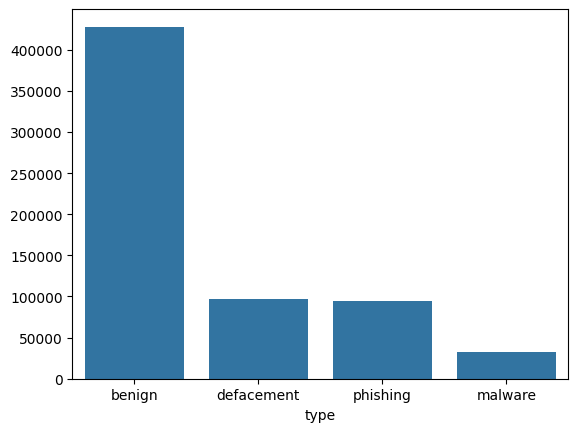

In [66]:
class_distruibution = data['type'].value_counts()
sns.barplot(x=class_distruibution.index, y=class_distruibution.values)

In [73]:
data.shape

(651191, 45)